# 課程目標:
了解MLP 在神經網路上的應用 <br />

# 範例重點:
以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型<br />
<br />
# 資料預處理 

In [1]:
from keras.utils import np_utils
from keras import datasets
import numpy as np

np.random.seed(10)

Using TensorFlow backend.


In [2]:
#Load Mnist dataset
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

x_train = train_x.reshape(-1,784).astype('float32')
x_test = test_x.reshape(-1,784).astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

y_train = np_utils.to_categorical(train_y, 10)
y_test = np_utils.to_categorical(test_y, 10)

# 建立模型

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
model = Sequential()
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))
model.summary()

W0705 16:29:14.820110 20272 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 16:29:14.851657 20272 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 16:29:14.855669 20272 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x_train, y_train, validation_split = 0.2, 
                         epochs = 10, batch_size = 32, verbose = 1)

W0705 16:32:44.464672 20272 deprecation.py:323] From D:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 16:32:44.573130 20272 deprecation_wrapper.py:119] From D:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 171us/step - loss: 0.2693 - acc: 0.9226 - val_loss: 0.1318 - val_acc: 0.9613
Epoch 2/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.1071 - acc: 0.9690 - val_loss: 0.1050 - val_acc: 0.9685
Epoch 3/10
48000/48000 [==============================] - 9s 182us/step - loss: 0.0706 - acc: 0.9782 - val_loss: 0.0947 - val_acc: 0.9715
Epoch 4/10
48000/48000 [==============================] - 8s 170us/step - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0813 - val_acc: 0.9754
Epoch 5/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0358 - acc: 0.9884 - val_loss: 0.0788 - val_acc: 0.9763
Epoch 6/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.0260 - acc: 0.9924 - val_loss: 0.0756 - val_acc: 0.9777
Epoch 7/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0193 - acc: 0.9941 - val_loss: 0.0836 - 

# 以圖形顯示訓練過程

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    
    plt.ylabel(train)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

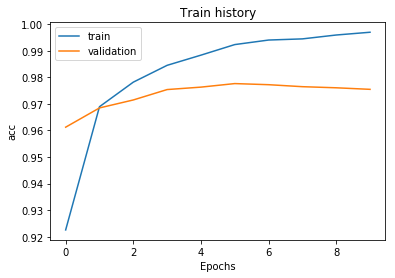

In [10]:
show_train_history(train_history, 'acc', 'val_acc')

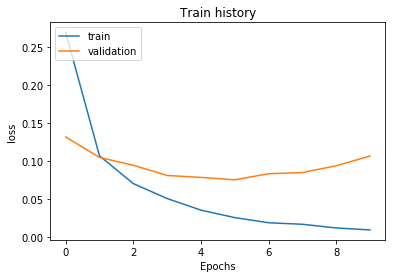

In [11]:
show_train_history(train_history, 'loss', 'val_loss')

# 評估模型準確率

In [12]:
scores = model.evaluate(x_test, y_test)
print(f'test score : {scores[1]}')

10000/10000 [==============================] - 0s 36us/step
test score : 0.9749


# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異 <br />
<br />
# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異 model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))<br />
<br />
# 資料預處理

In [13]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = 'normal',
               activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 128, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 244,298
Trainable params: 243,530
Non-trainable params: 768
_________________________________________________________________


In [16]:
trian_history = model.fit(x_train, y_train, validation_split = 0.2,
                         epochs = 10, batch_size = 32, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 215us/step - loss: 0.2543 - acc: 0.9261 - val_loss: 0.1247 - val_acc: 0.9598
Epoch 2/10
48000/48000 [==============================] - 9s 197us/step - loss: 0.1141 - acc: 0.9640 - val_loss: 0.0988 - val_acc: 0.9707
Epoch 3/10
48000/48000 [==============================] - 10s 199us/step - loss: 0.0901 - acc: 0.9711 - val_loss: 0.0817 - val_acc: 0.9772
Epoch 4/10
48000/48000 [==============================] - 11s 236us/step - loss: 0.0730 - acc: 0.9770 - val_loss: 0.0857 - val_acc: 0.9728
Epoch 5/10
48000/48000 [==============================] - 15s 311us/step - loss: 0.0629 - acc: 0.9799 - val_loss: 0.0887 - val_acc: 0.9742
Epoch 6/10
48000/48000 [==============================] - 11s 235us/step - loss: 0.0556 - acc: 0.9814 - val_loss: 0.0865 - val_acc: 0.9761
Epoch 7/10
48000/48000 [==============================] - 13s 268us/step - loss: 0.0452 - acc: 0.9852 - val_loss: 0.0

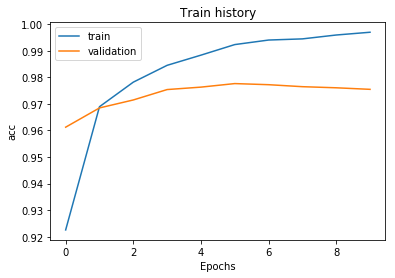

In [17]:
show_train_history(train_history, 'acc', 'val_acc')

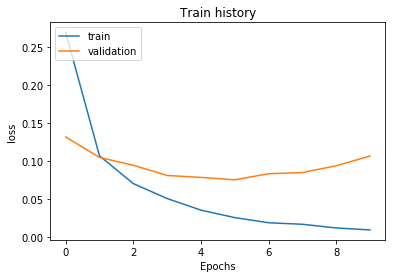

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [19]:
scores = model.evaluate(x_test, y_test)
print(f'test scores : {scores[1]}')

10000/10000 [==============================] - 0s 36us/step
test scores : 0.9727
